In [1]:
# Install the OpenAI and LangChain libraries
# - `openai`: Provides access to OpenAI's GPT models for tasks like text generation, embeddings, and completions.
# - `langchain`: A framework for building applications using large language models (LLMs).
#                Includes tools for chaining prompts, memory, and integrations like knowledge graphs.
!pip install -q openai langchain
# Attempt to install the LangChain Community library
# - `langchain-community`: This may refer to a community-supported version or extensions of LangChain.
#   Ensure this package exists and is maintained if errors occur during installation.
!pip install -q langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.9 MB/s eta 0:00:00


This script initializes the OpenAI API client and defines a function to interact with the GPT model. The get_chat_response function sends a user-provided text input to the GPT model (gpt-3.5-turbo) and returns the model's response.

In [2]:

import os
from openai import OpenAI

# Set the API key in the environment variable
os.environ["OPENAI_API_KEY"] = "sk-MNL1gYbV6CyXkh2rwPxao_D7n8nSxwW4_0wozr5sUtT3BlbkFJoEpwVXUH_Z3deg71NI-mM8QqSOkOGzQ5WDXmQ8FQEA" # Replace with your actual API key

client = OpenAI()

def get_chat_response(text):
    """
    This function takes a text input and returns the chat completion message.
    """
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": text,
            }
        ],
        model="gpt-3.5-turbo",
    )
    return chat_completion.choices[0].message.content


In [3]:
# Core libraries
import os
import re
import json
import random
import textwrap
import unicodedata
import urllib.parse
from collections import defaultdict

# Data handling & scientific computing
import numpy as np  # Numerical operations and arrays
import pandas as pd  # Data manipulation and analysis

# Visualization
import matplotlib.pyplot as plt  # Plotting
import matplotlib.colors as mcolors  # Colors for plots
import seaborn as sns  # Statistical visualization

# Graphs
import networkx as nx  # Graph/network analysis
from langchain.graphs.networkx_graph import NetworkxEntityGraph, KnowledgeTriple  # (subject, predicate, object) triples

# LangChain / LLM
from langchain.llms import OpenAI  # Language models
from langchain.chains import GraphQAChain  # QA over knowledge graphs
from langchain.prompts import PromptTemplate  # Prompt engineering

# Distance & similarity measures
from scipy.spatial.distance import cosine  # Cosine similarity
from scipy.stats import wasserstein_distance  # Wasserstein distance
from sklearn.metrics.pairwise import cosine_similarity

# Machine learning models & evaluation
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    roc_curve,
    auc,
)

# Google Colab utilities
from google.colab import drive

# OpenAI
from openai import OpenAI as OpenAIClient


In [ ]:
!pip install  rdflib  SPARQLWrapper

This script defines a knowledge graph using a set of triples representing entities (nodes) and their relationships (edges). The triples are categorized into parts based on themes, such as LLMs in the legal context, RAG integration, collaborations, and key people involved. The knowledge graph is constructed programmatically by adding these triples into the graph index, which allows for efficient querying and analysis.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 8.8 MB/s eta 0:00:00
Mounted at /content/drive
Successfully loaded 17074 entries from /content/drive/MyDrive/PrimeKG_Data/final_test.json

Structured Diabetes Knowledge Graph (Focused on Strong Connections):


# Part 1
(Neonatal insulin-dependent diabetes mellitus) → (associated with) → (insulin-like growth factor receptor binding)
(insulin-like growth factor receptor binding) → (ppi) → (Neonatal insulin-dependent diabetes mellitus)
(Neonatal insulin-dependent diabetes mellitus) → (associated with) → (insulin-like growth factor receptor binding)
(insulin-like growth factor receptor binding) → (ppi) → (Neonatal insulin-dependent diabetes mellitus)
(Neonatal insulin-dependent diabetes mellitus) → (ppi) → (insulin-like growth factor receptor binding)
(insulin-like growth factor receptor binding) → (associated with) → (Neonatal insulin-dependent diabetes mellitus)
(Neonatal insulin-dependent diabetes mellitus) → (ppi) → (insulin-li

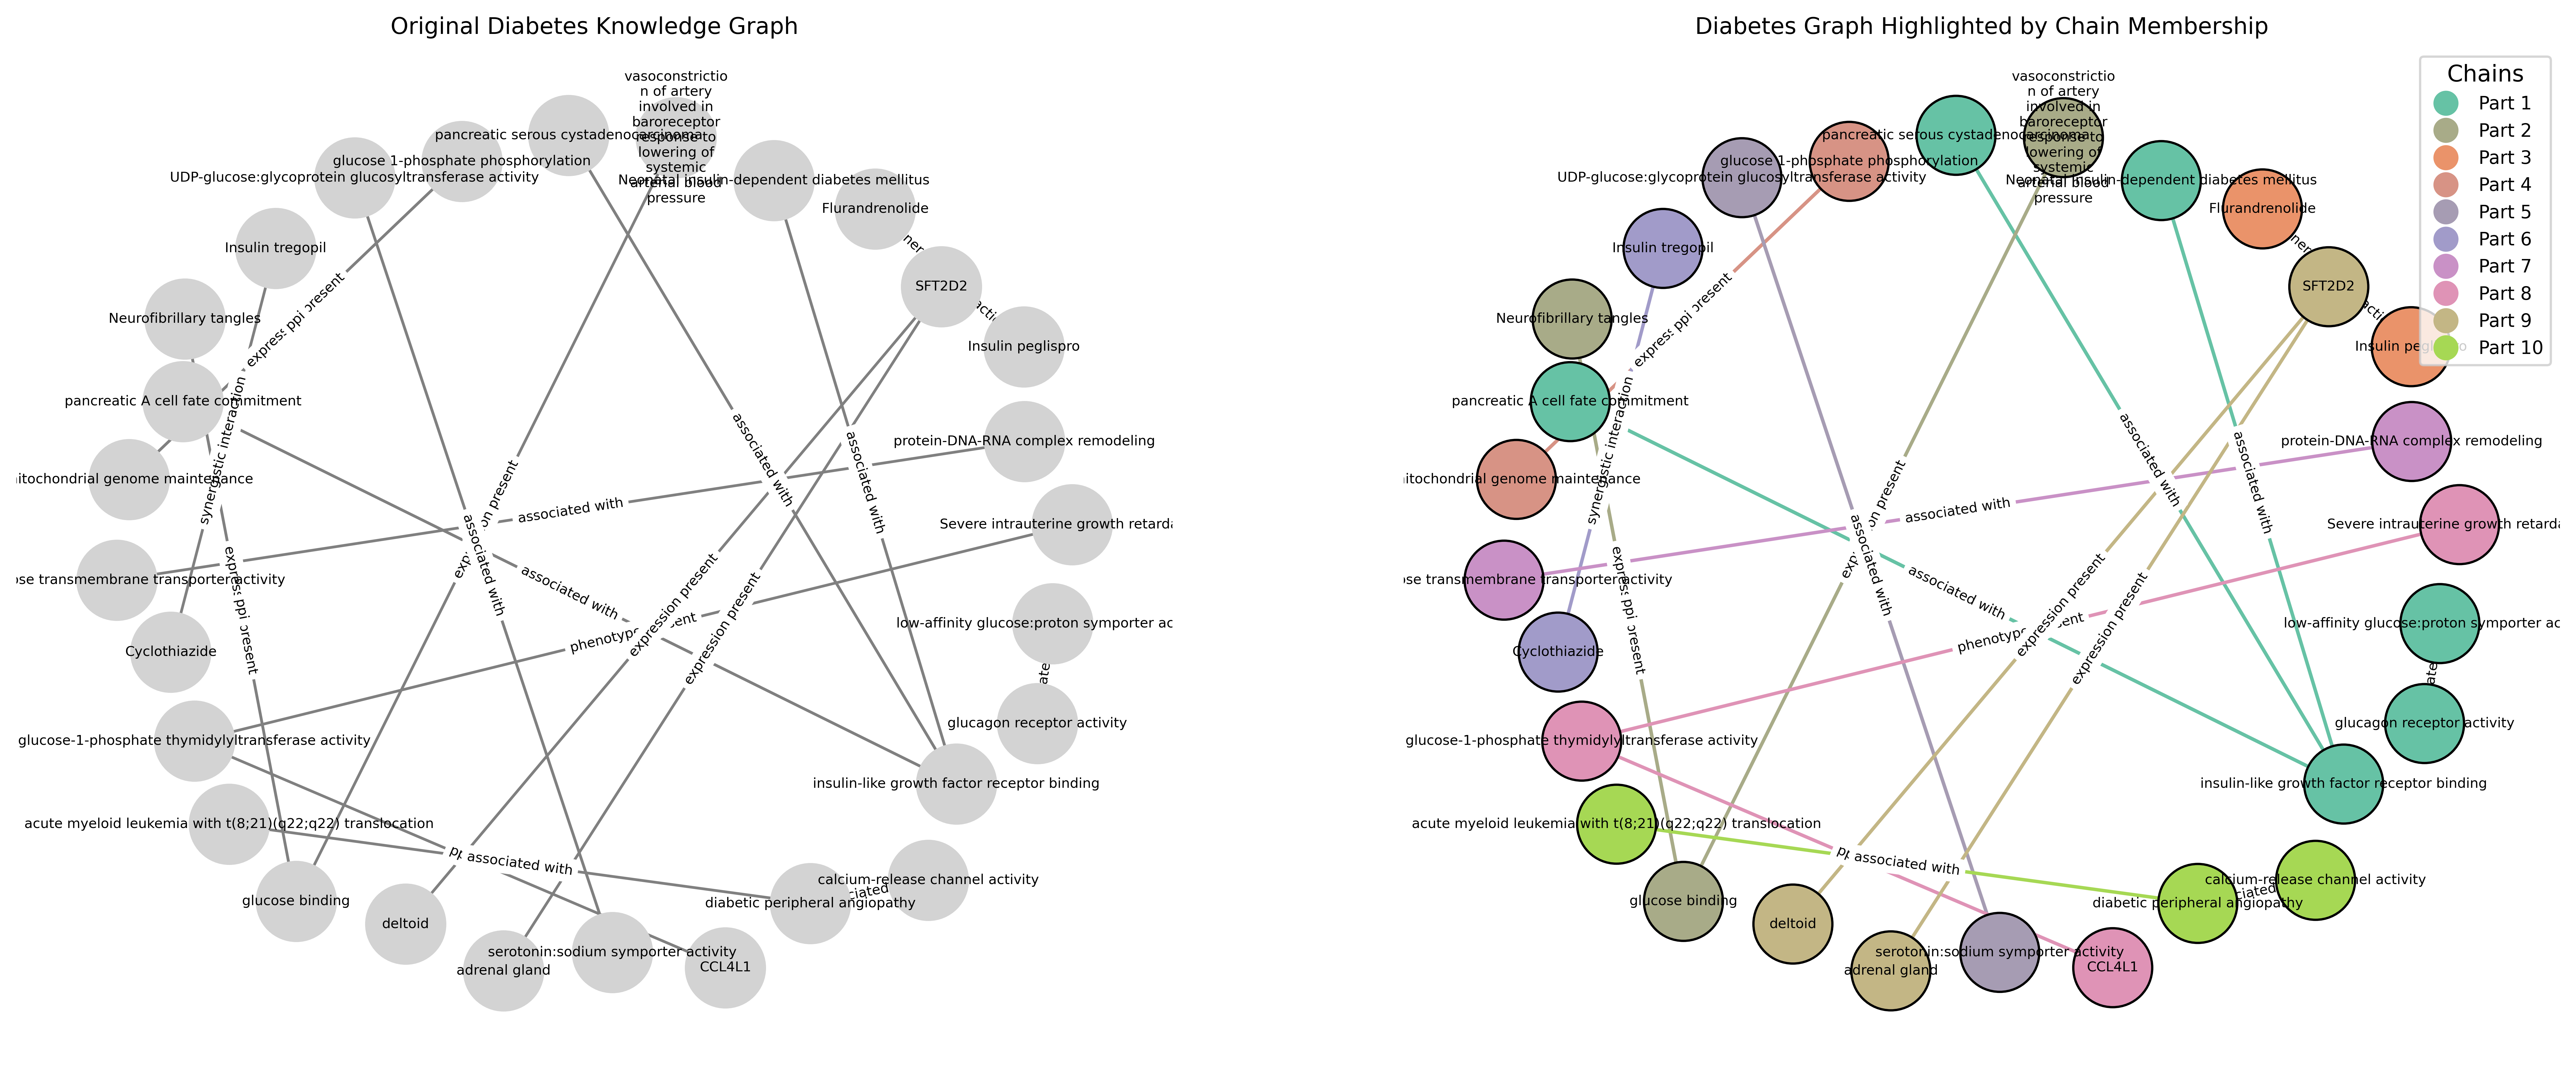


--- Node Chain Mapping ---
Node 'Neonatal insulin-dependent diabetes mellitus' belongs to chain 'Part 1'.
Node 'insulin-like growth factor receptor binding' belongs to chain 'Part 1'.
Node 'pancreatic A cell fate commitment' belongs to chain 'Part 1'.
Node 'pancreatic serous cystadenocarcinoma' belongs to chain 'Part 1'.
Node 'glucagon receptor activity' belongs to chain 'Part 1'.
Node 'low-affinity glucose:proton symporter activity' belongs to chain 'Part 1'.
Node 'vasoconstriction of artery involved in baroreceptor response to lowering of systemic arterial blood pressure' belongs to chain 'Part 2'.
Node 'glucose binding' belongs to chain 'Part 2'.
Node 'Neurofibrillary tangles' belongs to chain 'Part 2'.
Node 'Flurandrenolide' belongs to chain 'Part 3'.
Node 'Insulin peglispro' belongs to chain 'Part 3'.
Node 'glucose 1-phosphate phosphorylation' belongs to chain 'Part 4'.
Node 'mitochondrial genome maintenance' belongs to chain 'Part 4'.
Node 'UDP-glucose:glycoprotein glucosyltrans

/tmp/ipython-input-4-1246179747.py:252: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = LangChainOpenAI(temperature=temp, api_key=os.environ["OPENAI_API_KEY"])  # Explicit API key
/tmp/ipython-input-4-1246179747.py:254: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  original_answer = chain.run(question)


Embedding generated successfully. Length: 1536

Original Answer: 
1. Gene: Certain genetic variations can increase the risk of developing diabetes.
2. Insulin: Insulin is a hormone produced by the pancreas that regulates blood sugar levels. In diabetes, the body either does not produce enough insulin or does not use it effectively.
3. Pancreas: The pancreas is the organ responsible for producing insulin and releasing it into the bloodstream.
4. Glucose: Glucose is a type of sugar that is the main source of energy for the body's cells. In diabetes, there is an imbalance in glucose levels in the blood.
5. Obesity: Being overweight or obese is a major risk factor for developing type 2 diabetes.
6. Inflammation: Chronic inflammation in the body can contribute to the development of diabetes.
7. Autoimmune response: In type 1 diabetes, the body's immune system mistakenly attacks and destroys the insulin-producing cells in the pancreas.
8. Lifestyle factors: Diet, physical activity, and stres

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

# Set the API key in the environment variable and initialize client
os.environ["OPENAI_API_KEY"] = "sk-MNL1gYbV6CyXkh2rwPxao_D7n8nSxwW4_0wozr5sUtT3BlbkFJoEpwVXUH_Z3deg71NI-mM8QqSOkOGzQ5WDXmQ8FQEA"
client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])  # Explicitly set API key

# Paths
file_path = "/content/drive/MyDrive/PrimeKG_Data/final_test.json"
output_dir = "/content/drive/MyDrive/PrimeKG_Data/"

# Embedding cache and model
embedding_cache = {}
EMBEDDING_MODEL = "text-embedding-ada-002"  # Unified model

def get_chat_response(text):
    chat_completion = client.chat.completions.create(
        messages=[{"role": "user", "content": text}],
        model="gpt-3.5-turbo",
    )
    return chat_completion.choices[0].message.content

def load_primekg_data(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        print(f"Successfully loaded {len(data)} entries from {file_path}")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return []

def is_diabetes_related(text):
    core_diabetes_terms = ['diabetes', 'diabetic', 'insulin', 'glucose', 'type 1 diabetes', 'type 2 diabetes', 't1d', 't2d']
    secondary_terms = ['hyperglycemia', 'hypoglycemia', 'glycemic', 'a1c', 'hemoglobin a1c', 'gestational diabetes', 'prediabetes', 'metabolic syndrome', 'pancreatic', 'islet', 'beta cell', 'metformin', 'glucagon', 'diabetic retinopathy', 'diabetic nephropathy', 'diabetic neuropathy']
    text_lower = text.lower()
    for term in core_diabetes_terms:
        if term in text_lower:
            return 2
    for term in secondary_terms:
        if term in text_lower:
            return 1
    return 0

def extract_diabetes_knowledge_graph(data, max_parts=10):
    all_diabetes_triples = []
    for entry in data:
        triples = entry.get('value', [])
        if not triples:
            continue
        for triple in triples:
            if len(triple) == 3:
                subject, predicate, obj = triple
                subject_decoded = urllib.parse.unquote(subject)
                predicate_decoded = urllib.parse.unquote(predicate)
                obj_decoded = urllib.parse.unquote(obj)
                total_score = is_diabetes_related(subject_decoded) + is_diabetes_related(predicate_decoded) + is_diabetes_related(obj_decoded)
                if total_score > 0:
                    all_diabetes_triples.append((triple, total_score))

    all_diabetes_triples.sort(key=lambda x: x[1], reverse=True)
    G = nx.Graph()
    for (triple, _) in all_diabetes_triples:
        subject, predicate, obj = triple
        subject_decoded = urllib.parse.unquote(subject)
        obj_decoded = urllib.parse.unquote(obj)
        G.add_edge(subject_decoded, obj_decoded, relation=predicate)

    connected_components = list(nx.connected_components(G))
    connected_components.sort(key=len, reverse=True)
    components_to_use = connected_components[:max_parts]

    nodes_to_keep = set()
    for component in components_to_use:
        nodes_to_keep.update(component)

    filtered_triples = []
    for (triple, score) in all_diabetes_triples:
        subject, predicate, obj = triple
        subject_decoded = urllib.parse.unquote(subject)
        obj_decoded = urllib.parse.unquote(obj)
        if subject_decoded in nodes_to_keep and obj_decoded in nodes_to_keep:
            filtered_triples.append(triple)

    kg = []
    portion_indices = {}
    triple_index = 0
    portion_counter = 1

    print("\nStructured Diabetes Knowledge Graph (Focused on Strong Connections):\n")
    component_to_triples = defaultdict(list)
    for triple in filtered_triples:
        subject, _, obj = triple
        subject_decoded = urllib.parse.unquote(subject)
        obj_decoded = urllib.parse.unquote(obj)
        for i, component in enumerate(components_to_use):
            if subject_decoded in component and obj_decoded in component:
                component_to_triples[i].append(triple)
                break

    for component_idx, triples in component_to_triples.items():
        if not triples or portion_counter > max_parts:
            continue
        triples = triples[:20]  # Limit to 20 triples per part
        start_index = triple_index
        end_index = start_index + len(triples)
        portion_indices[f"Part {portion_counter}"] = range(start_index, end_index)
        print(f"\n# Part {portion_counter}")
        for triple in triples:
            subject, predicate, obj = triple
            subject_decoded = urllib.parse.unquote(subject)
            predicate_decoded = urllib.parse.unquote(predicate)
            obj_decoded = urllib.parse.unquote(obj)
            print(f"({subject_decoded}) → ({predicate_decoded}) → ({obj_decoded})")
            kg.append((subject_decoded, predicate_decoded, obj_decoded))
            triple_index += 1
        print("-" * 80)
        portion_counter += 1
        if portion_counter > max_parts:
            break

    return kg, portion_indices

def save_knowledge_graph(kg, output_file=os.path.join(output_dir, "focused_diabetes_kg.txt")):
    try:
        with open(output_file, "w", encoding="utf-8") as f:
            for triple in kg:
                f.write(f"( {triple[0]} , {triple[1]} , {triple[2]} )\n\n")
        print(f"\nFocused Diabetes Knowledge Graph saved as '{output_file}'.")
    except Exception as e:
        print(f"Error saving knowledge graph: {e}")

def wrap_text(text, max_words=8):
    words = text.split()
    return "\n".join(textwrap.wrap(text, width=15)) if len(words) > max_words else text

def visualize_graph_with_chains(kg, part_indices):
    G = nx.DiGraph()
    for node1, relation, node2 in kg:
        G.add_edge(node1, node2, label=relation)
    pos = nx.spring_layout(G, k=8, iterations=100, seed=0)
    chain_cmap = mcolors.LinearSegmentedColormap.from_list('chain_colors', ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'])
    chain_norm = mcolors.Normalize(vmin=0, vmax=len(part_indices) - 1)
    node_colors = ['lightblue'] * len(G.nodes())
    edge_colors = ['gray'] * len(G.edges())
    chain_color_map = {f"Part {i+1}": chain_cmap(chain_norm(i)) for i in range(len(part_indices))}
    node_chain_map = {}
    for chain_name, indices in part_indices.items():
        color = chain_color_map[chain_name]
        for idx in indices:
            node1, _, node2 = kg[idx]
            if node1 in G.nodes:
                node_chain_map[node1] = chain_name
                node_colors[list(G.nodes).index(node1)] = color
            if node2 in G.nodes:
                node_chain_map[node2] = chain_name
                node_colors[list(G.nodes).index(node2)] = color
    for i, (node1, node2) in enumerate(G.edges()):
        for chain_name, indices in part_indices.items():
            color = chain_color_map[chain_name]
            for idx in indices:
                n1, _, n2 = kg[idx]
                if (node1, node2) == (n1, n2):
                    edge_colors[i] = color
                    break
    wrapped_labels = {node: wrap_text(node) for node in G.nodes()}
    fig, axs = plt.subplots(1, 2, figsize=(20, 8), dpi=600)
    nx.draw_networkx_nodes(G, pos, node_color='#d3d3d3', node_size=1200, ax=axs[0])
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.2, ax=axs[0])
    nx.draw_networkx_labels(G, pos, labels=wrapped_labels, font_size=6, ax=axs[0])
    edge_labels = nx.get_edge_attributes(G, 'label')
    wrapped_edge_labels = {edge: wrap_text(label) for edge, label in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=wrapped_edge_labels, font_size=6, ax=axs[0])
    axs[0].set_title("Original Diabetes Knowledge Graph", fontsize=10)
    axs[0].axis('off')
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1200, ax=axs[1], edgecolors='black')
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5, ax=axs[1])
    nx.draw_networkx_labels(G, pos, labels=wrapped_labels, font_size=6, ax=axs[1])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=wrapped_edge_labels, font_size=6, ax=axs[1])
    axs[1].set_title("Diabetes Graph Highlighted by Chain Membership", fontsize=10)
    axs[1].axis('off')
    handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='', label=chain_name) for chain_name, color in chain_color_map.items()]
    axs[1].legend(handles=handles, title="Chains", loc='upper right', fontsize=8)
    plt.show()
    print("\n--- Node Chain Mapping ---")
    for node, chain in node_chain_map.items():
        print(f"Node '{node}' belongs to chain '{chain}'.")

def perturb_kg_by_removing_parts(kg, parts_to_remove, portion_indices):
    indices_to_remove = set()
    for part in parts_to_remove:
        if part in portion_indices:
            indices_to_remove.update(portion_indices[part])
    perturbed_kg = [triple for i, triple in enumerate(kg) if i not in indices_to_remove]
    return perturbed_kg

def normalize_text(text):
    text = text.replace("\n", " ").strip()
    text = unicodedata.normalize("NFKC", text)
    text = re.sub(r"\s+", " ", text)
    text = text.lower()
    return text

def get_embedding(text):
    text = normalize_text(text)
    if text in embedding_cache:
        return embedding_cache[text]
    try:
        response = client.embeddings.create(input=[text], model=EMBEDDING_MODEL)
        embedding = response.data[0].embedding
        embedding_cache[text] = embedding
        return embedding
    except AttributeError:
        print(f"Error: 'embeddings' attribute not found. Please update the OpenAI library using '!pip install -U openai' and restart the runtime. Returning zero vector for '{text}'.")
        return [0] * 1536
    except Exception as e:
        print(f"Error getting embedding for '{text}': {e}")
        return [0] * 1536

def get_answer_and_embedding(question: str, temp: float, graph):
    """
    Sends a question and temperature to the GraphQAChain and returns the original answer string and its embedding.
    """
    # Initialize the GraphQAChain with OpenAI LLM
    llm = LangChainOpenAI(temperature=temp, api_key=os.environ["OPENAI_API_KEY"])  # Explicit API key
    chain = GraphQAChain.from_llm(llm, graph=graph, verbose=False)
    original_answer = chain.run(question)
    original_answer_str = str(original_answer)

    # Generate embedding using the OpenAI client
    try:
        response = client.embeddings.create(
            model=EMBEDDING_MODEL,  # Use the same model as get_embedding
            input=original_answer_str
        )
        original_answer_embedding = response.data[0].embedding
        print(f"Embedding generated successfully. Length: {len(original_answer_embedding)}")
    except Exception as e:
        print(f"Error generating embedding: {e}. Returning zero vector.")
        original_answer_embedding = [0] * 1536  # Fallback to zero vector

    return original_answer_str, original_answer_embedding

def plot_knowledge_graph_explainability(kg, part_indices, coeff):
    G = nx.DiGraph()
    for node1, relation, node2 in kg:
        G.add_edge(node1, node2, label=relation)
    pos = nx.spring_layout(G, k=8, iterations=100, seed=0)
    cmap = mcolors.LinearSegmentedColormap.from_list('red_blue', ['blue', '#d3d3d3', 'red'])
    norm = mcolors.Normalize(vmin=-1, vmax=1)
    node_sizes = [1500 + 100 * G.degree(node) for node in G.nodes()]
    node_colors = []
    edge_colors = []
    for node in G.nodes():
        for part_name, indices in part_indices.items():
            part_idx = int(part_name.split()[-1]) - 1
            coeff_value = coeff[part_idx]
            color = cmap(norm(coeff_value))
            if node in [kg[i][0] for i in indices] or node in [kg[i][2] for i in indices]:
                node_colors.append(color)
                break
        else:
            node_colors.append('#8da0cb')
    for i, (node1, node2) in enumerate(G.edges()):
        for part_name, indices in part_indices.items():
            part_idx = int(part_name.split()[-1]) - 1
            coeff_value = coeff[part_idx]
            color = cmap(norm(coeff_value))
            if i in indices:
                edge_colors.append(color)
                break
        else:
            edge_colors.append('gray')
    wrapped_labels = {node: wrap_text(node) for node in G.nodes()}
    fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=600, gridspec_kw={'width_ratios': [1, 1.3]})
    nx.draw_networkx_nodes(G, pos, node_color='#d3d3d3', node_size=node_sizes, ax=axs[0])
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.5, ax=axs[0])
    nx.draw_networkx_labels(G, pos, labels=wrapped_labels, font_size=8, ax=axs[0])
    edge_labels = nx.get_edge_attributes(G, 'label')
    wrapped_edge_labels = {edge: wrap_text(label) for edge, label in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=wrapped_edge_labels, font_size=8, ax=axs[0])
    axs[0].set_title("Original Diabetes Knowledge Graph", fontsize=12)
    axs[0].axis('off')
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, ax=axs[1])
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.8, ax=axs[1])
    nx.draw_networkx_labels(G, pos, labels=wrapped_labels, font_size=8, ax=axs[1])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=wrapped_edge_labels, font_size=8, ax=axs[1])
    axs[1].set_title("Simple SMILE GraphRAG Explainability", fontsize=12)
    axs[1].axis('off')
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=axs[1], label='Importance Coefficients')
    plt.savefig(os.path.join(output_dir, 'knowledge_graph_explainability_improved.png'), bbox_inches='tight')
    plt.show()


# Main execution
if __name__ == "__main__":
    primekg_data = load_primekg_data(file_path)
    if not primekg_data:
        print("No data loaded.")
        exit()
    kg, portion_indices = extract_diabetes_knowledge_graph(primekg_data, max_parts=10)
    if not kg:
        print("No diabetes-related information found.")
        exit()
    print(f"\nFound {len(kg)} strongly connected diabetes-related triples in {len(portion_indices)} parts.")
    print("\nPortion Indices:\n")
    for part, index_range in portion_indices.items():
        print(f"{part}: {index_range}")
    save_knowledge_graph(kg)
    print("\nFinal Focused Diabetes Knowledge Graph List:\n")
    for triple in kg:
        print("(", triple[0], ",", triple[1], ", ", triple[2], ")")
    print("Original KG node count:", len(set(node for triple in kg for node in (triple[0], triple[2]))))

    graph = NetworkxEntityGraph()
    for node1, relation, node2 in kg:
        graph.add_triple(KnowledgeTriple(node1, relation, node2))

    visualize_graph_with_chains(kg, portion_indices)

    #question = "What is associated with neonatal insulin-dependent diabetes mellitus?"
    question = "What are the key biological and medical factors involved in diabetes?"
    temp = 0.001
    original_answer_str, original_answer_embedding = get_answer_and_embedding(question, temp, graph)
    print(f"\nOriginal Answer: {original_answer_str}")

    original = np.ones(len(portion_indices)).reshape(1, -1)

    #coeff = calculate_coefficients_print_Temerature(temp, original, kg, list(portion_indices.keys()), portion_indices, question, original_answer_embedding, original_answer_str)
    #plot_knowledge_graph_explainability(kg, portion_indices, coeff)

In [5]:
# Instantiate the graph
graph = NetworkxEntityGraph()

# Build the graph from the knowledge triples
for (node1, relation, node2) in kg:
    graph.add_triple(KnowledgeTriple(node1, relation, node2))

Visualizes the knowledge graph as a directed graph using NetworkX and Matplotlib. Nodes represent entities, and edges depict relationships with labels for clarity. The layout uses spring positioning with increased spacing for readability. Custom node colors and labeled edges enhance the visualization, displayed without axes.

In [6]:
def wrap_text(text, max_words=8):
    """Wrap text if it contains more than `max_words` words."""
    words = text.split()
    return "Explanation" if len(words) > max_words else text

def visualize_graph_with_chains(kg, part_indices):
    """
    Visualize a directed graph highlighting nodes and edges by chain membership.

    Parameters:
        kg (list of tuples): The knowledge graph as a list of (node1, relation, node2).
        part_indices (dict): A dictionary where keys are chain names and values are lists of indices
                             corresponding to the `kg` entries in each chain.
    Returns:
        None
    """
    # Create graph
    G = nx.DiGraph()
    for node1, relation, node2 in kg:
        G.add_edge(node1, node2, label=relation)

    # Generate positions for the graph
    pos = nx.spring_layout(G, k=8, iterations=100, seed=0)

    # Define color maps
    chain_cmap = mcolors.LinearSegmentedColormap.from_list('chain_colors', ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'])
    chain_norm = mcolors.Normalize(vmin=0, vmax=len(part_indices) - 1)

    # Initialize node and edge colors
    node_colors = ['lightblue'] * len(G.nodes())
    edge_colors = ['gray'] * len(G.edges())

    # Step 1: Assign distinct colors for each chain
    chain_color_map = {}
    for i, (chain_name, indices) in enumerate(part_indices.items()):
        color = chain_cmap(chain_norm(i))
        chain_color_map[chain_name] = color

    # Step 2: Color nodes based on the chain they belong to
    node_chain_map = {}
    for chain_name, indices in part_indices.items():
        color = chain_color_map[chain_name]
        for idx in indices:
            node1, relation, node2 = kg[idx]

            # Update node colors based on chain
            if node1 in G.nodes:
                node_chain_map[node1] = chain_name
                node_colors[list(G.nodes).index(node1)] = color
            if node2 in G.nodes:
                node_chain_map[node2] = chain_name
                node_colors[list(G.nodes).index(node2)] = color

    # Step 3: Assign edge colors based on the chain
    for i, (node1, node2) in enumerate(G.edges()):
        for chain_name, indices in part_indices.items():
            color = chain_color_map[chain_name]
            for idx in indices:
                n1, _, n2 = kg[idx]
                if (node1, node2) == (n1, n2):
                    edge_colors[i] = color
                    break

    # Apply label filtering
    wrapped_labels = {node: wrap_text(node) for node in G.nodes()}

    # Create the figure with subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 8), dpi=600)

    # Left: Original Knowledge Graph
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1200, ax=axs[0])
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.2, ax=axs[0])
    nx.draw_networkx_labels(G, pos, labels=wrapped_labels, font_size=6, ax=axs[0])
    edge_labels = nx.get_edge_attributes(G, 'label')
    wrapped_edge_labels = {edge: wrap_text(label) for edge, label in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=wrapped_edge_labels, font_size=6, ax=axs[0])
    axs[0].set_title("Original Knowledge Graph", fontsize=10)
    axs[0].axis('off')

    # Right: Highlighted Nodes Based on Chains
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1200, ax=axs[1], edgecolors='black')
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5, ax=axs[1])
    nx.draw_networkx_labels(G, pos, labels=wrapped_labels, font_size=6, ax=axs[1])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=wrapped_edge_labels, font_size=6, ax=axs[1])
    axs[1].set_title("Graph Highlighted by Chain Membership", fontsize=10)
    axs[1].axis('off')

    # Create a legend for chain colors
    handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='', label=chain_name)
               for chain_name, color in chain_color_map.items()]
    axs[1].legend(handles=handles, title="Chains", loc='upper right', fontsize=8)

    # Display the plot
    plt.show()

    # Print which nodes belong to which chain
    print("\n--- Node Chain Mapping ---")
    for node, chain in node_chain_map.items():
        print(f"Node '{node}' belongs to chain '{chain}'.")


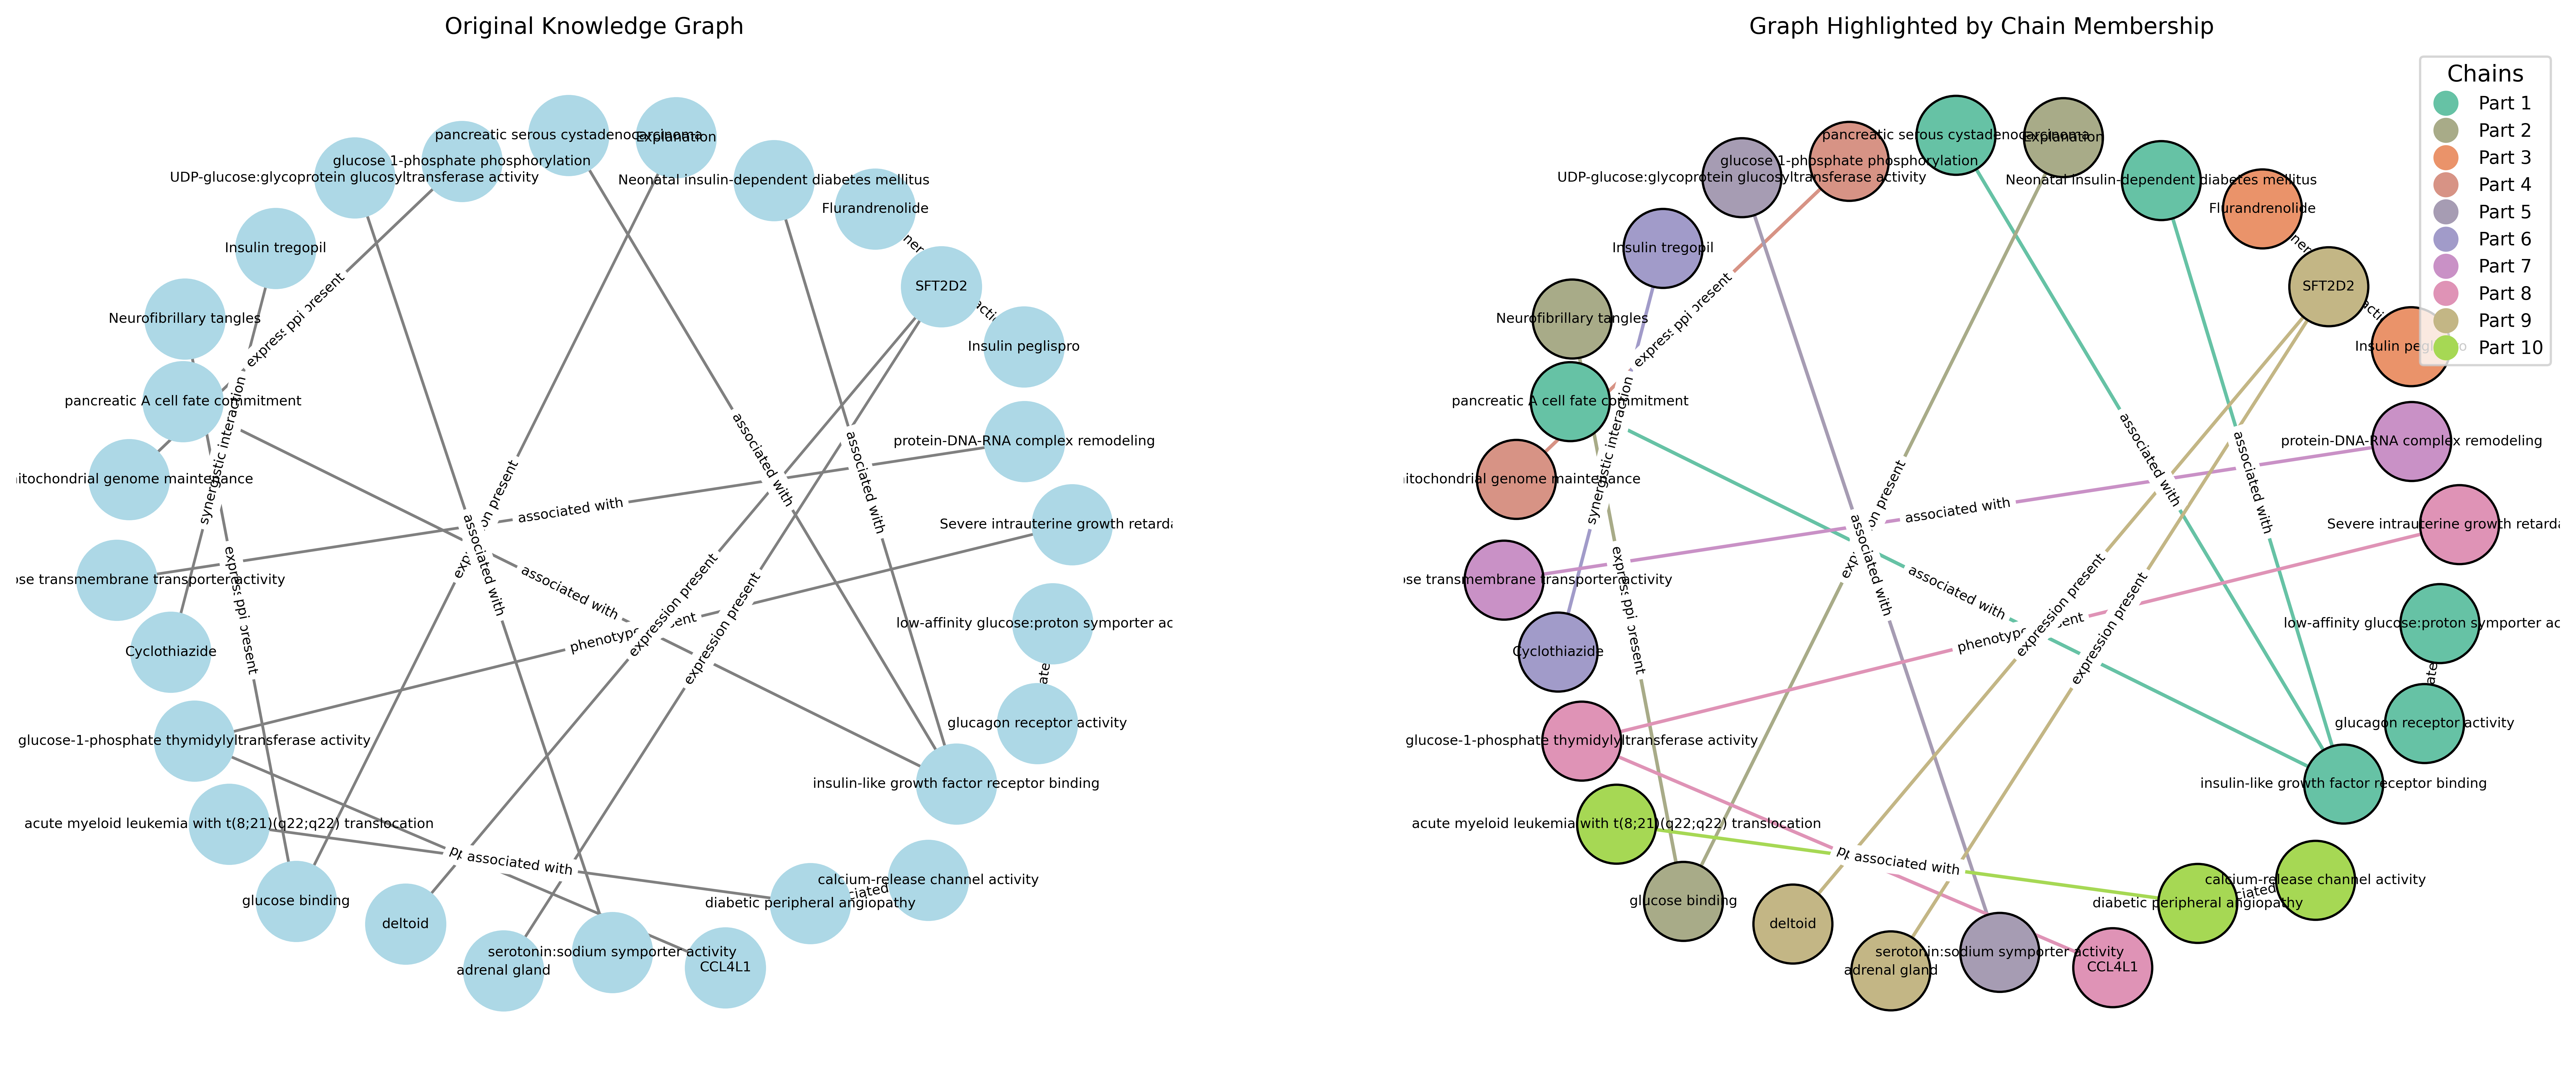


--- Node Chain Mapping ---
Node 'Neonatal insulin-dependent diabetes mellitus' belongs to chain 'Part 1'.
Node 'insulin-like growth factor receptor binding' belongs to chain 'Part 1'.
Node 'pancreatic A cell fate commitment' belongs to chain 'Part 1'.
Node 'pancreatic serous cystadenocarcinoma' belongs to chain 'Part 1'.
Node 'glucagon receptor activity' belongs to chain 'Part 1'.
Node 'low-affinity glucose:proton symporter activity' belongs to chain 'Part 1'.
Node 'vasoconstriction of artery involved in baroreceptor response to lowering of systemic arterial blood pressure' belongs to chain 'Part 2'.
Node 'glucose binding' belongs to chain 'Part 2'.
Node 'Neurofibrillary tangles' belongs to chain 'Part 2'.
Node 'Flurandrenolide' belongs to chain 'Part 3'.
Node 'Insulin peglispro' belongs to chain 'Part 3'.
Node 'glucose 1-phosphate phosphorylation' belongs to chain 'Part 4'.
Node 'mitochondrial genome maintenance' belongs to chain 'Part 4'.
Node 'UDP-glucose:glycoprotein glucosyltrans

In [7]:
visualize_graph_with_chains(kg, portion_indices)

Defines a function to perturb the knowledge graph by selectively removing triples belonging to specified parts. This allows testing the impact of missing information on downstream tasks or analysis. The function filters out triples associated with the indices of the parts to be removed and returns the modified knowledge graph.

In [8]:
def perturb_kg_by_removing_parts(kg, parts_to_remove):
    """
    Perturbs the knowledge graph by removing triples from the specified parts.

    Parameters:
    - kg: The full knowledge graph triples list
    - parts_to_remove: List of part names to remove

    Returns:
    - perturbed_kg: The perturbed KG without the specified parts
    """
    perturbed_kg = []

    # Collect indices of the triples to keep based on parts to remove
    indices_to_remove = set()
    for part in parts_to_remove:
        indices_to_remove.update(portion_indices[part])

    # Add triples that are not in the indices to remove
    perturbed_kg = [triple for i, triple in enumerate(kg) if i not in indices_to_remove]

    return perturbed_kg

This function computes the embedding for a given text using a specified model. It processes the text by removing newline characters and queries the OpenAI embeddings API to generate a vector representation, useful for similarity comparisons and downstream tasks.

In [9]:
embedding_cache = {}
EMBEDDING_MODEL = "text-embedding-3-small"
def normalize_text(text):
    """
    Normalize text by removing excessive spaces, normalizing Unicode characters,
    and converting to lowercase.
    """
    text = text.replace("\n", " ").strip()  # Remove newlines and extra spaces
    text = unicodedata.normalize("NFKC", text)  # Normalize Unicode characters
    text = re.sub(r"\s+", " ", text)  # Replace multiple spaces with a single space
    text = text.lower()  # Convert to lowercase (optional but recommended)
    return text

def get_embedding(text):
    text = normalize_text(text)
    if text in embedding_cache:
        return embedding_cache[text]  # Return cached embedding
    embedding = client.embeddings.create(input=[text], model=EMBEDDING_MODEL).data[0].embedding
    embedding_cache[text] = embedding  # Store result in cache
    return embedding

Defines a function to query a GraphQAChain with a question and temperature setting, returning the answer and its embedding. The function initializes the chain with a specified graph and temperature, processes the question, and computes the embedding for the returned answer, facilitating downstream analysis or comparison

In [10]:
def get_answer_and_embedding(question: str, temp: float, graph):
    """
    Sends a question and temperature to the GraphQAChain and returns the original answer string
    and its embedding as separate outputs.

    Args:
        question (str): The question to ask the chain.
        temp (float): The temperature setting for the OpenAI model.
        graph: The graph object for the GraphQAChain.

    Returns:
        Tuple[str, list]: The original answer as a string and its embedding as a list.
    """
    # Initialize the GraphQAChain with the specified temperature
    chain = GraphQAChain.from_llm(OpenAI(temperature=temp), graph=graph, verbose=False)

    # Run the question through the chain to get the answer
    original_answer = chain.run(question)
    original_answer_str = str(original_answer)

    # Compute the embedding for the original answer
    original_answer_embedding = get_embedding(original_answer)

    # Return both answer and embedding separately
    return original_answer_str, original_answer_embedding


Defines the question to query the GraphQAChain or knowledge retrieval system. Here, the question "What is RAG?" seeks information about Retrieval-Augmented Generation, a framework that integrates external knowledge bases to improve the accuracy and reliability of AI-generated responses

In [11]:
 question = "What is Neonatal insulin-dependent diabetes mellitus associated with?"
#Portion 3

This snippet sets the temperature parameter to 0 for deterministic response generation and queries the GraphQAChain with the question, "What is RAG?". The function get_answer_and_embedding returns the original answer as a string along with its embedding. The answer is then printed for review.


In [12]:
!pip install langchain-openai
from langchain_openai import OpenAI
llm = OpenAI(temperature=0, api_key=os.environ["OPENAI_API_KEY"])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.2 MB/s eta 0:00:00


In [13]:
# Initialize the LLM
#llm = OpenAI(temperature=0)
# llm = LangChainOpenAI(temperature=0, api_key=os.environ["OPENAI_API_KEY"])  # ✅ CORRECT
temp = 0
original_answer_str, original_answer_embedding = get_answer_and_embedding(question, temp, graph)
print(original_answer_str)

 Neonatal insulin-dependent diabetes mellitus is associated with insulin-like growth factor receptor binding.


In [14]:
# Define the original vector (all parts present)
original = np.array([1, 1, 1, 1, 1,1, 1, 1, 1, 1])
original = original.reshape(1, -1)  # Shape becomes (1, 10)

# Consistency: Providing similar explanations for similar queries or inputs.

This function calculates feature importance coefficients by analyzing the impact of perturbations
on a knowledge graph's response fidelity. It removes parts of the graph, generates perturbed responses,
and measures their similarity to the original response using cosine similarity. A linear regression model
is trained on the perturbation vectors and corresponding similarity values, with weights applied to account
for the perturbations' relative importance. The resulting coefficients indicate the significance of each
graph component in preserving response fidelity.

In [15]:
def calculate_coefficients(original, kg, part_names, question, original_answer_embedding, original_answer_str):
    """
    Function to calculate coefficients for perturbations on a knowledge graph.
    It removes parts of the KG, generates perturbed responses, and calculates coefficients.

    Parameters:
    - original: Original vector (numpy array)
    - kg: Knowledge graph (list of triples)
    - part_names: List of part names in the KG
    - question: Question for GraphQAChain
    - original_answer_embedding: Embedding of the original answer
    - original_answer_str: Original answer text

    Returns:
    - coeff: Coefficients from linear regression
    """
    similarities_wd = []
    perturbations_vect2 = []
    perturbation_texts = []
    generated_embeddings = []
    epsilon = 1e-6

    for i in range(20):  # Number of perturbations
        perturbation_vector = original.copy().flatten()
        num_parts_to_remove = random.randint(1, len(part_names))
        parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)

        for part_idx in parts_to_remove_indices:
            perturbation_vector[part_idx] = 0

        perturbations_vect2.append(perturbation_vector)
        parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]

        # Call the perturb_kg_by_removing_parts function directly
        perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove)

        graph_temp = NetworkxEntityGraph()
        for (node1, relation, node2) in perturbed_kg:
            graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

        chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=graph_temp, verbose=False)
        temp_response = chain.run(question)

        perturbation_texts.append(temp_response)

        # Call the get_embedding function directly
        temp_response_embedding = get_embedding(temp_response)
        generated_embeddings.append(temp_response_embedding)

        # Calculate Wasserstein distance
        similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
        similarities_wd.append(similarity_wd)

    perturbations_vect2 = np.array(perturbations_vect2)
    distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original, metric='cosine').ravel()

    kernel_width = 0.25
    weights = np.sqrt(np.exp(-(distances**2) / kernel_width**2))

    inverse_similarities_wd = [1.0 / (dist + epsilon) for dist in similarities_wd]

    # Scale inverse Wasserstein distances
    min_value = min(inverse_similarities_wd)
    max_value = max(inverse_similarities_wd)
    if min_value == max_value:
      print("Warning: min_value and max_value are equal. Avoiding division by zero.")
      scaled_inverse_similarities_wd = [1.0 for _ in inverse_similarities_wd]  # Assign a constant
    else:
      scaled_inverse_similarities_wd = [
          (value - min_value) / (max_value - min_value) for value in inverse_similarities_wd
      ]

    # Linear regression for cosine similarities
    simpler_model = LinearRegression()
    # Linear regression for scaled inverse Wasserstein distances
    simpler_model.fit(X=perturbations_vect2, y=scaled_inverse_similarities_wd, sample_weight=weights)
    coeff = simpler_model.coef_
    return coeff


In [17]:
def calculate_coefficients(original, kg, part_names, question, original_answer_embedding, original_answer_str):
    """
    Function to calculate coefficients for perturbations on a knowledge graph.
    It removes parts of the KG, generates perturbed responses, and calculates coefficients.

    Parameters:
    - original: Original vector (numpy array)
    - kg: Knowledge graph (list of triples)
    - part_names: List of part names in the KG
    - question: Question for GraphQAChain
    - original_answer_embedding: Embedding of the original answer
    - original_answer_str: Original answer text

    Returns:
    - coeff: Coefficients from linear regression
    """
    similarities_wd = []
    perturbations_vect2 = []
    perturbation_texts = []
    generated_embeddings = []
    epsilon = 1e-6

    for i in range(20):  # Number of perturbations
        perturbation_vector = original.copy().flatten()
        num_parts_to_remove = random.randint(1, len(part_names))
        parts_to_remove_indices = random.sample(range(len(part_names)), num_parts_to_remove)

        for part_idx in parts_to_remove_indices:
            perturbation_vector[part_idx] = 0

        perturbations_vect2.append(perturbation_vector)
        parts_to_remove = [part_names[idx] for idx in parts_to_remove_indices]

        # Call the perturb_kg_by_removing_parts function directly
        perturbed_kg = perturb_kg_by_removing_parts(kg, parts_to_remove)

        graph_temp = NetworkxEntityGraph()
        for (node1, relation, node2) in perturbed_kg:
            graph_temp.add_triple(KnowledgeTriple(node1, relation, node2))

        chain = GraphQAChain.from_llm(OpenAI(temperature=0), graph=graph_temp, verbose=False)
        temp_response = chain.run(question)

        perturbation_texts.append(temp_response)

        # Call the get_embedding function directly
        temp_response_embedding = get_embedding(temp_response)
        generated_embeddings.append(temp_response_embedding)

        # Calculate Wasserstein distance
        similarity_wd = wasserstein_distance(original_answer_embedding, temp_response_embedding)
        similarities_wd.append(similarity_wd)

    perturbations_vect2 = np.array(perturbations_vect2)
    distances = sklearn.metrics.pairwise_distances(perturbations_vect2, original, metric='cosine').ravel()

    kernel_width = 0.25
    weights = np.sqrt(np.exp(-(distances**2) / kernel_width**2))

    inverse_similarities_wd = [1.0 / (dist + epsilon) for dist in similarities_wd]

    # Scale inverse Wasserstein distances
    min_value = min(inverse_similarities_wd)
    max_value = max(inverse_similarities_wd)
    if min_value == max_value:
      print("Warning: min_value and max_value are equal. Avoiding division by zero.")
      scaled_inverse_similarities_wd = [1.0 for _ in inverse_similarities_wd]  # Assign a constant
    else:
      scaled_inverse_similarities_wd = [
          (value - min_value) / (max_value - min_value) for value in inverse_similarities_wd
      ]

    # Linear regression for cosine similarities
    simpler_model = LinearRegression()
    # Linear regression for scaled inverse Wasserstein distances
    simpler_model.fit(X=perturbations_vect2, y=scaled_inverse_similarities_wd, sample_weight=weights)
    coeff = simpler_model.coef_
    return coeff

This script runs the `calculate_coefficients` function 50 times, each time perturbing the knowledge graph
and computing feature importance coefficients. The iteration number (test case) is prepended to the coefficients
from each run, and the results are stored in a DataFrame with appropriate column headers. The DataFrame is then
exported to a CSV file named "Book1.csv" for further analysis or reporting.

In [18]:
coefficients_list = []

# Run the function 50 times and collect coefficients
for i in range(1, 50):  # Run 50 iterations
    coeff = calculate_coefficients(
        original=original,
        kg=kg,
        part_names=list(portion_indices.keys()),
        question=question,
        original_answer_embedding=original_answer_embedding,
        original_answer_str=original_answer_str,
    )
    # Prepend the iteration number (Test Case) to the coefficients
    coefficients_list.append([i] + coeff.tolist())

# Create the DataFrame with proper headers
column_names = ['Test Case'] + [f'part {i + 1}' for i in range(len(coeff))]
coefficients_df = pd.DataFrame(coefficients_list, columns=column_names)

# Save to CSV
coefficients_df.to_csv("/content/drive/MyDrive/PrimeKG_Data/Book1.csv", index=False)

In [19]:
# Load the file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/PrimeKG_Data/Book1.csv')

# Display the columns of the DataFrame
print(df.columns)

Index(['Test Case', 'part 1', 'part 2', 'part 3', 'part 4', 'part 5', 'part 6',
       'part 7', 'part 8', 'part 9', 'part 10'],
      dtype='object')


This script visualizes the coefficients for different parts of a knowledge graph across multiple test cases
using a half-violin plot combined with a scatter plot ("rain" effect). The violin plot shows the distribution
of values for each part, while the scatter plot adds individual test case points with slight jitter for clarity.
Unique colors are assigned to each test case, and the plot is customized with a title, axis labels, and a legend
to improve interpretability.

/tmp/ipython-input-20-1953316364.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


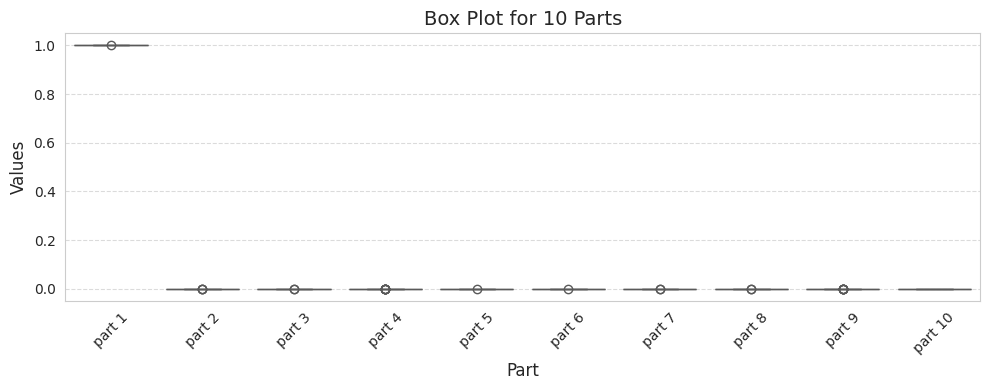

In [20]:
# Load the CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/PrimeKG_Data/Book1.csv")

# Define the 10 parts explicitly to ensure they are included
parts = ['part 1', 'part 2', 'part 3', 'part 4', 'part 5',
         'part 6', 'part 7', 'part 8', 'part 9', 'part 10']

# Reshape the data for seaborn (long format)
df_melted = df.melt(id_vars=['Test Case'], value_vars=parts, var_name='Part', value_name='Values')

# Set figure size and style
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")

# Create a simple box plot for 10 parts
sns.boxplot(
    data=df_melted, x="Part", y="Values", palette="Set2"
)

# Customize the plot
plt.title("Box Plot for 10 Parts", fontsize=14)
plt.ylabel("Values", fontsize=12)
plt.xlabel("Part", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
